In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  


from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import tree

%matplotlib inline

In [3]:
dataset = pd.read_csv("Datasets/bill_authentication.csv") 

In [4]:
dataset.shape

(1372, 5)

In [5]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
''' Divide Data into attributes and labels.
X is our attribute set and y contains the class'''
X = dataset.drop('Class', axis=1)  
y = dataset['Class'] 

'''The model_selection library of Scikit-Learn contains train_test_split method, 
which we'll use to randomly split the data into training and testing sets''' 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [7]:
'''The tree library contains built-in classes/methods for various decision tree algorithms 
(DecisionTreeRegressor, DecisionTreeClassifier). The fit method of this class is called to train the algorithm on the 
training data, which is passed as parameter to the fit method.''' 
classifier_decisionTree = DecisionTreeClassifier()  
classifier_decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
'Make predictions using the predict method'
y_pred = classifier_decisionTree.predict(X_test)  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[152   1]
 [  2 120]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       153
           1       0.99      0.98      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



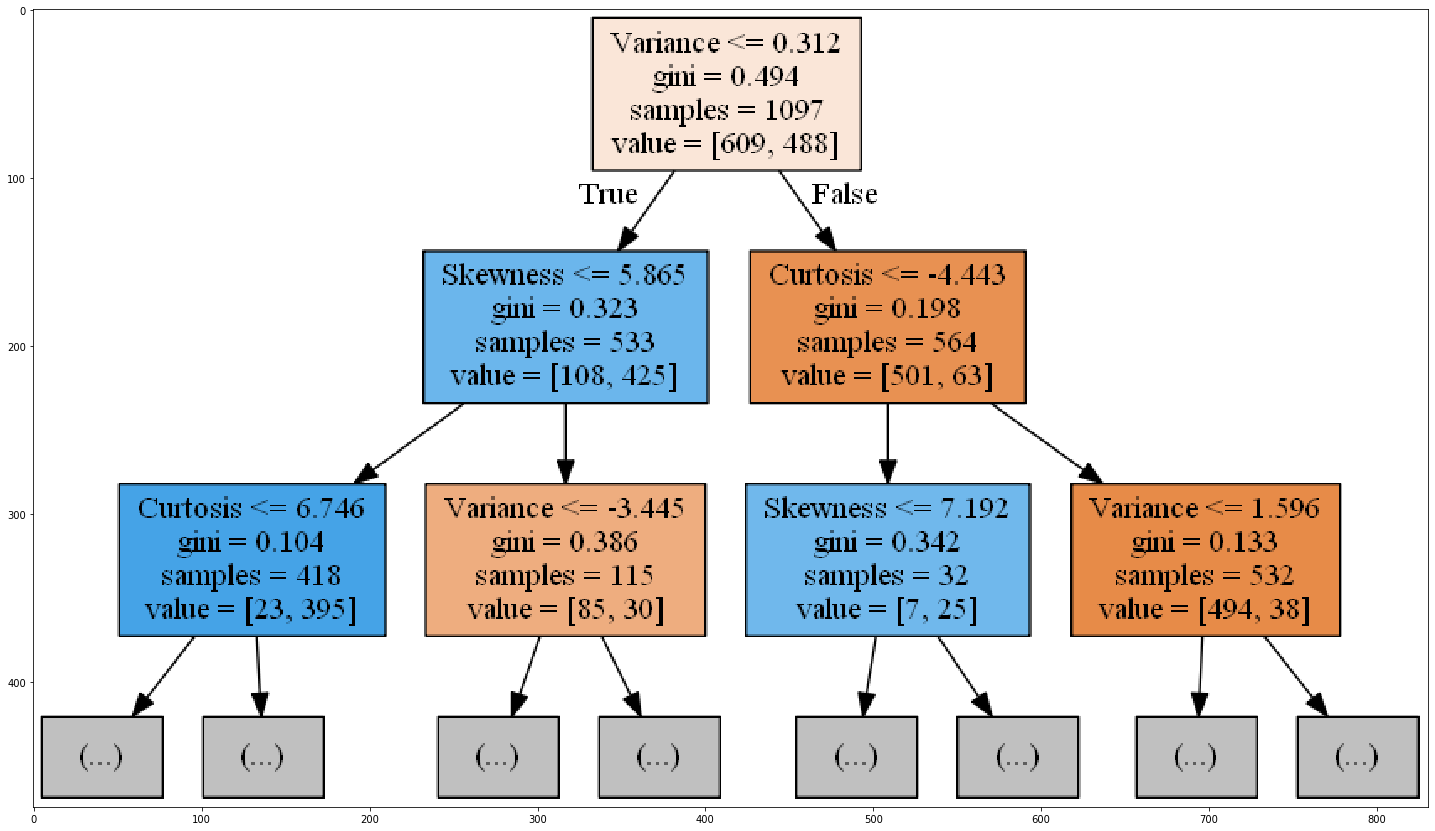

In [11]:
# Visualising the decision tree
#Need to download the graphviz tool yourself and then set the windows PATH 
#(C:\Program Files (x86)\Graphviz2.38\bin\). Then close and restart!

decision_tree = tree.export_graphviz(classifier_decisionTree, out_file='tree.dot',  
                                     feature_names=X_train.columns, filled=True, max_depth=2)

# converting the dot image to png format
!dot -Tpng tree.dot -o tree.png

#plotting the decision tree
image = plt.imread('tree.png')
plt.figure(figsize=(25,25))
plt.imshow(image)

c:\users\jmp\appdata\local\programs\python\python37\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


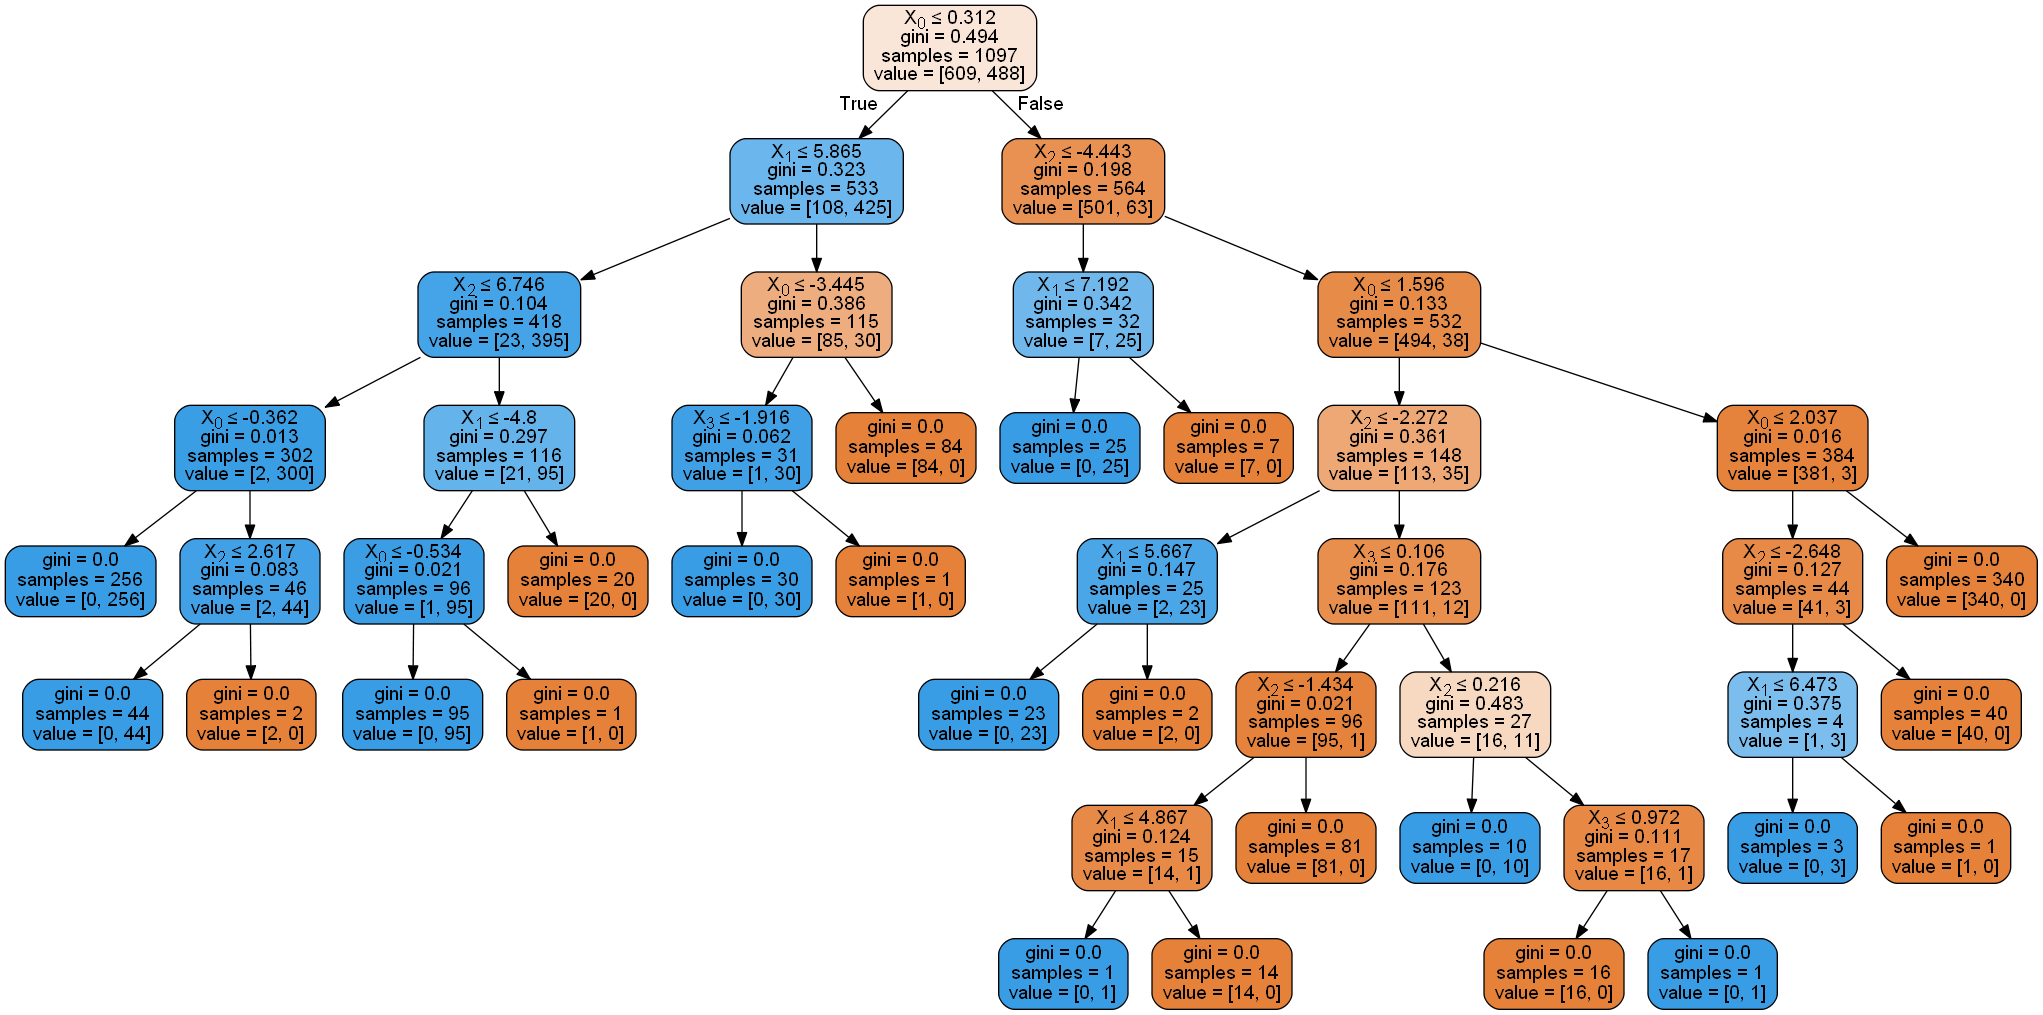

In [9]:
'Another Visualisation Method'
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier_decisionTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())